In [1]:
from time import time
import logging
import random as ra
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as pat
from numpy import linalg as LA
import statistics

from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import RandomizedPCA
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.feature_selection import RFECV
from sklearn.cross_validation import StratifiedKFold


print(__doc__)

Automatically created module for IPython interactive environment


In [2]:
df = pd.read_csv('STARTdata.csv',delimiter=",")
df

,START,Date_Screen,Date_PRE,Date_POST,Age_Screen_months,Age_PRE_months,Age_POST_months,Age_Scan_PRE_months,GROUP 1 dys_TX; 2 dys_noTX; 3 dys_TX_lowses; 4 typical; 5 other,Grade,...,rh_S_pericallosal_thickness,rh_S_postcentral_thickness,rh_S_precentral-inf-part_thickness,rh_S_precentral-sup-part_thickness,rh_S_suborbital_thickness,rh_S_subparietal_thickness,rh_S_temporal_inf_thickness,rh_S_temporal_sup_thickness,rh_S_temporal_transverse_thickness,rh_MeanThickness_thickness
0,START_001,3/8/2012,6/20/2012,8/29/2012,78,81.0,84.0,82.0,1.0,1,...,2.327,2.339,2.709,2.413,3.174,2.923,2.943,2.805,3.125,2.76751
1,START_002,3/10/2012,6/9/2012,8/18/2012,88,91.0,93.0,90.0,1.0,1,...,2.288,2.389,2.585,2.359,2.154,2.608,2.663,2.840,2.537,2.65667
2,START_004,3/19/2012,7/11/2012,9/15/2012,81,85.0,87.0,84.0,2.0,1,...,2.194,2.241,2.441,2.441,2.886,2.659,2.668,2.762,2.359,2.71222
3,START_005,3/20/2012,7/6/2012,8/22/2012,89,93.0,94.0,91.0,1.0,1,...,1.983,2.372,2.740,2.499,2.021,2.559,2.625,2.612,2.630,2.55159
4,START_006,3/21/2012,6/10/2012,8/22/2012,94,97.0,99.0,96.0,1.0,2,...,2.156,2.375,2.625,2.546,3.039,2.790,2.660,2.781,2.361,2.74051
5,START_007,3/21/2012,6/10/2012,8/22/2012,94,97.0,99.0,96.0,1.0,2,...,2.077,2.238,2.458,2.575,2.935,2.829,2.500,2.720,2.301,2.73581
6,START_008,3/23/2012,6/3/2012,8/18/2012,83,86.0,88.0,85.0,1.0,1,...,2.372,2.411,2.921,2.584,3.787,2.897,2.886,3.066,3.223,2.87140
7,START_009,3/24/2012,7/15/2012,9/1/2012,92,96.0,98.0,94.0,2.0,2,...,2.458,2.415,2.673,2.469,2.826,2.746,2.577,2.821,2.949,2.77928
8,START_010,3/24/2012,6/2/2012,8/28/2012,81,84.0,86.0,83.0,2.0,1,...,2.413,2.284,2.314,2.478,2.719,2.667,2.652,2.721,2.730,2.58628
9,START_011,3/26/2012,6/20/2012,8/24/2012,91,94.0,96.0,93.0,1.0,2,...,2.020,2.264,2.499,2.446,2.679,2.527,2.532,2.752,3.274,2.66196


In [3]:
TOWREswePost = df["SWE2Bss_POST"]
TOWREswePre = df["SWE2ss"]
TOWREpdPost = df["PDE2Bss_POST"] 
TOWREpdPre = df["PDE2ss"]
WRMTwiPost = df["WBWIss_POST"]
WRMTwiPre = df["W3WIss"]
WRMTwaPost = df["WBWAss_POST"]
WRMTwaPre = df["W3WAss"]
SITPost = df["SIT1ss_POST"]
SITPre = df["SIT1ss"]
Group = df["Group_Assignment"]

In [4]:
A = TOWREswePost - TOWREswePre
B = TOWREpdPost - TOWREpdPre
C = WRMTwiPost - WRMTwiPre
D = WRMTwaPost - WRMTwaPre
E = SITPost - SITPre

scoreDict = {'TOWREswePost':TOWREswePost,'TOWREswePre':TOWREswePre,'TOWREpdPost':TOWREpdPost ,'TOWREpdPre':TOWREpdPre,'WRMTwiPost':WRMTwiPost,'WRMTwiPre':WRMTwiPre ,'WRMTwaPost':WRMTwaPost,'WRMTwaPre':WRMTwaPre,'SITPost':SITPost,'SITPre':SITPre}

In [5]:
#cm = pd.DataFrame({'TOWREswe' : A,'TOWREpd' : B,'WRMTwi': C,'SIT' : E, 'Group_Assignment':Group},
#columns=['TOWREswe','TOWREpd','WRMTwi','SIT','Group_Assignment'])
cm = pd.DataFrame({'TOWREswe' : A,'TOWREpd' : B,'WRMTwi': C ,'SIT' : E,'Group_Assignment':Group}, 
columns=['TOWREswe','TOWREpd','WRMTwi', 'SIT','Group_Assignment'])




null_cm = cm[cm.isnull().any(axis=1)].index

for value in null_cm:
    cm = cm.drop([value])
print(cm)

    TOWREswe  TOWREpd  WRMTwi   SIT Group_Assignment
0       -1.0     15.0    -1.0   5.0     intervention
1      -18.0     -7.0   -11.0 -14.0     intervention
2        1.0     -2.0    -2.0   6.0  waiting_control
3      -13.0     -3.0     4.0  14.0     intervention
4       -9.0      4.0   -14.0  21.0     intervention
5        4.0     -2.0     4.0  11.0     intervention
6        7.0      5.0    -4.0   3.0     intervention
7       10.0     -3.0    -5.0  -9.0  waiting_control
9       -6.0     -1.0     5.0  16.0     intervention
10       0.0    -12.0   -11.0   8.0  waiting_control
11     -13.0    -12.0    -4.0   9.0  waiting_control
12      -3.0    -17.0    -5.0 -29.0  waiting_control
13      -6.0     -7.0    -5.0  12.0     intervention
14       5.0     -5.0    -4.0   2.0  waiting_control
15     -14.0    -28.0   -10.0  -3.0     intervention
16      -1.0    -10.0     7.0   0.0  waiting_control
17      -1.0     -3.0    -3.0  13.0     intervention
18       7.0     12.0    -2.0  16.0     interv

In [6]:
num_subjects = len(cm.index)

indexDict = {}

for column in cm:
    if column == 'Group_Assignment':
        break
    filtered_tscore = []
    for index in cm.index:
        tscore =abs(cm[column][index])/(statistics.stdev(cm[column])/math.sqrt(num_subjects))
        if abs(tscore)>=1.675:
            filtered_tscore.append(index)
    indexDict[column] = filtered_tscore

In [7]:
cm2 = cm.corr()
print(cm2)
print()
print(cm2.sum(axis = None))

          TOWREswe   TOWREpd    WRMTwi       SIT
TOWREswe  1.000000  0.429451  0.370043  0.301339
TOWREpd   0.429451  1.000000  0.360126  0.470692
WRMTwi    0.370043  0.360126  1.000000  0.330844
SIT       0.301339  0.470692  0.330844  1.000000

TOWREswe    2.100833
TOWREpd     2.260269
WRMTwi      2.061013
SIT         2.102875
dtype: float64


In [8]:
#correlationMatrix = pd.DataFrame({'TOWREswe' : A,'TOWREpd' : B,'WRMTwi': C, 'WRTwa' : D ,'SIT' : E}, 
#columns=['TOWREswe','TOWREpd','WRMTwi', 'WRTwa', 'SIT'])

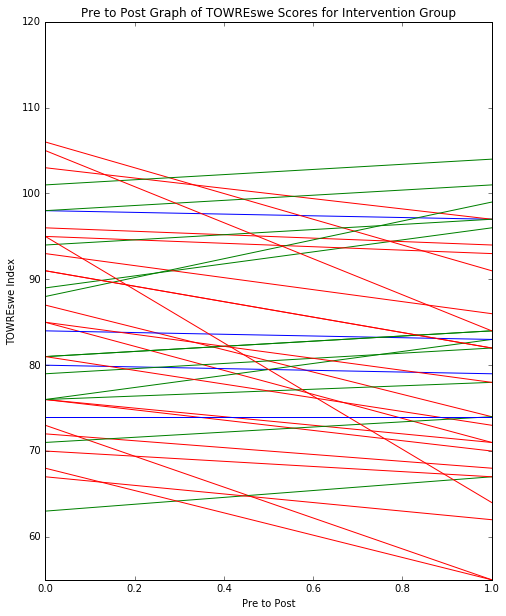

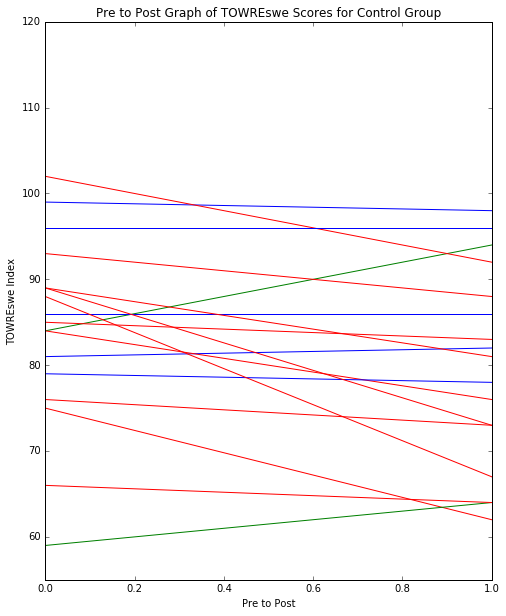

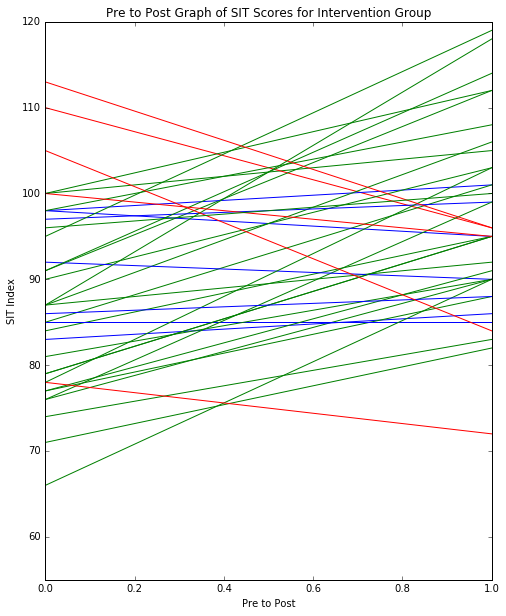

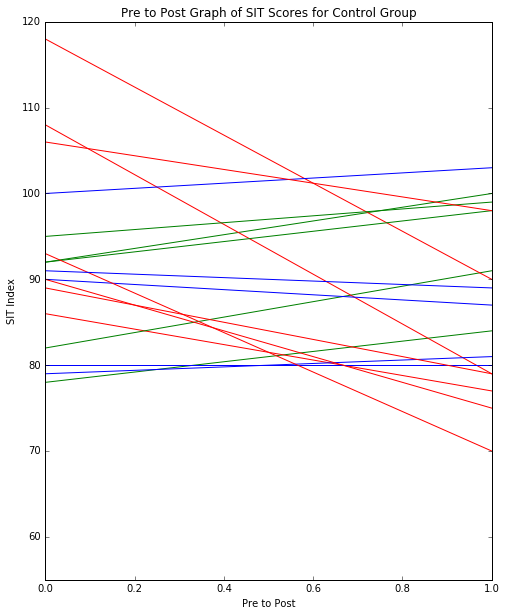

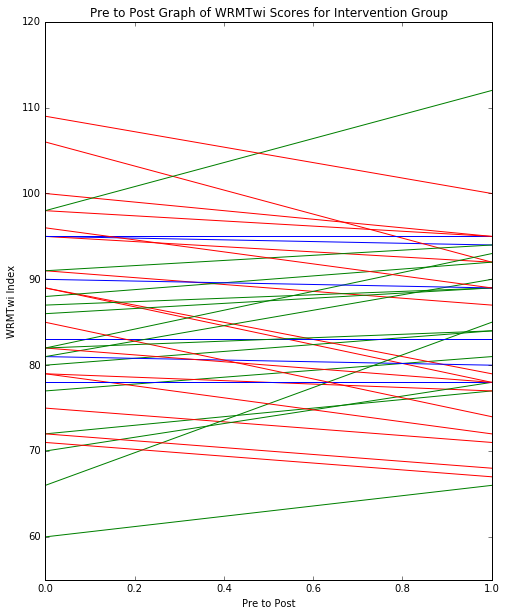

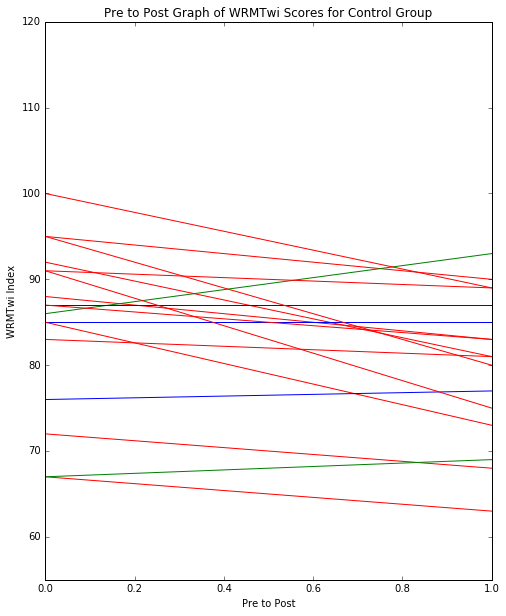

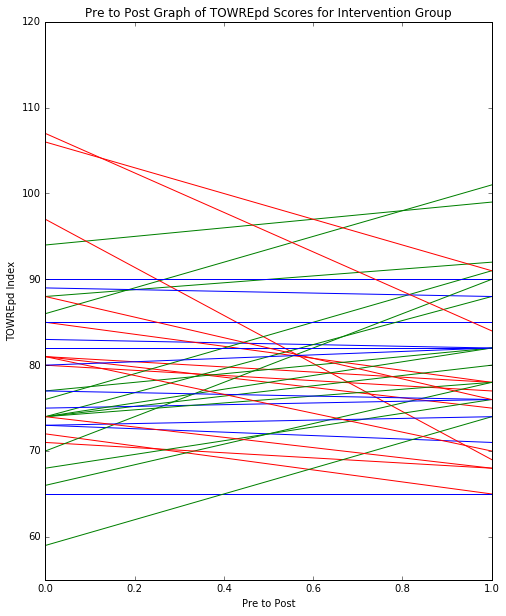

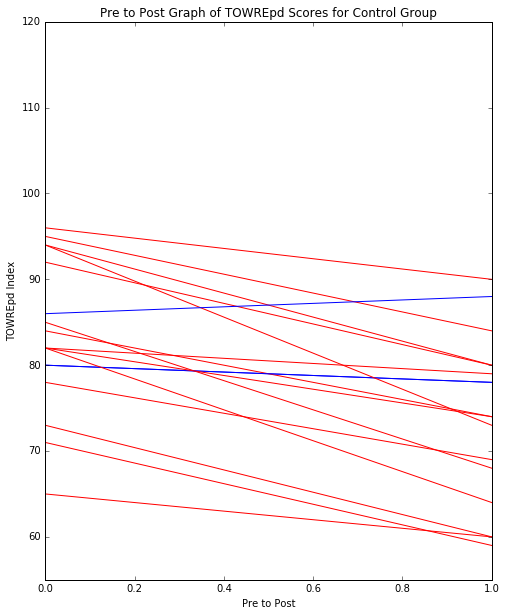

In [9]:
for column in indexDict:
    fig, intervention = plt.subplots()
    fig2, control = plt.subplots()
    for index in cm.index:
        if (index in indexDict[column]):
            if (cm[column][index]>0):
                color = 'g'
            elif(cm[column][index]<0):
                color = 'r'
        else:
            color = 'b'
        pre = column+"Pre"
        post = column+"Post"
        if cm["Group_Assignment"][index] == "intervention":
            intervention.plot([0,1], [scoreDict[pre][index],scoreDict[post][index]], color)
        else:
            control.plot([0,1], [scoreDict[pre][index],scoreDict[post][index]], color)
    fig.set_size_inches(8,10)
    fig2.set_size_inches(8,10)
    intervention.axis([0, 1, 55, 120])
    intervention.set_xlabel('Pre to Post')
    intervention.set_ylabel(str(column)+' Index')
    intervention.set_title('Pre to Post Graph of '+str(column)+' Scores for Intervention Group')
    control.axis([0, 1, 55, 120])
    control.set_xlabel('Pre to Post')
    control.set_ylabel(str(column)+' Index')
    control.set_title('Pre to Post Graph of '+str(column)+" Scores for Control Group")
    plt.show()

In [10]:
y = pd.read_csv('PostData.csv',delimiter=",",usecols=range(2,3))
X = pd.read_csv('STARTdatanopost.csv',delimiter=",",usecols=list(range(52,53)).append(range(99,393)))
brain = X.loc[:,'lh_G_and_S_frontomargin_volume':'Group_Assignment']
TOWRE = X.loc[:,'PDE2ss']
X = pd.concat([TOWRE, brain], axis= 1)
for index in X.index:
    if X["Group_Assignment"][index] == "waiting_control":
        y = y.drop([index])
        X = X.drop([index])
del X['Group_Assignment']

null_y = y[y.isnull().any(axis=1)].index

for value in null_y:
    y = y.drop([value])
    X = X.drop([value])
null_X = X[X.isnull().any(axis=1)].index

for value in null_X:
    y = y.drop([value])
    X = X.drop([value])
    
print(X)

    PDE2ss  lh_G_and_S_frontomargin_volume  lh_G_and_S_occipital_inf_volume  \
0     86.0                            2745                             3669   
1     72.0                            2647                             3995   
3     80.0                            1739                             3331   
4     88.0                            2792                             3160   
5     73.0                            2418                             3270   
6     94.0                            3561                             4173   
9     83.0                            2712                             4376   
13    85.0                            2355                             3567   
15    97.0                            2480                             3297   
17    81.0                            2845                             3728   
18    66.0                            2982                             2947   
19    65.0                            2383          

In [11]:
n_components = 1
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5)
pca = RandomizedPCA(n_components = n_components).fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
param_grid = {'C': [10, 50, 1e2, 5e2, 1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVR(kernel='rbf'),param_grid)
clf = clf.fit(X_train_pca, np.ravel(y_train))
print("Best estimator found by grid search:")
print(clf.best_estimator_)

y_pred = clf.predict(X_train_pca)
score = clf.score(X_test_pca,np.ravel(y_test))

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Measured Score vs. Predicted Score on TOWREpde Using SVR with RBF Kernel \n Score = %f' % score)

In [41]:
'''
svr = SVR(kernel = "linear",tol=1e-3)
rfecv = RFECV(estimator=svr, step=1, cv = 5)
postpred = rfecv.fit(X,np.ravel(y))

print("Optimal number of features : %d" % rfecv.n_features_)
'''

'\nsvr = SVR(kernel = "linear",tol=1e-3)\nrfecv = RFECV(estimator=svr, step=1, cv = 5)\npostpred = rfecv.fit(X,np.ravel(y))\n\nprint("Optimal number of features : %d" % rfecv.n_features_)\n'